# Forelesning 4: Statistikk II

## Regresjon I: Polyfit

## Regresjon II: Curve_fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

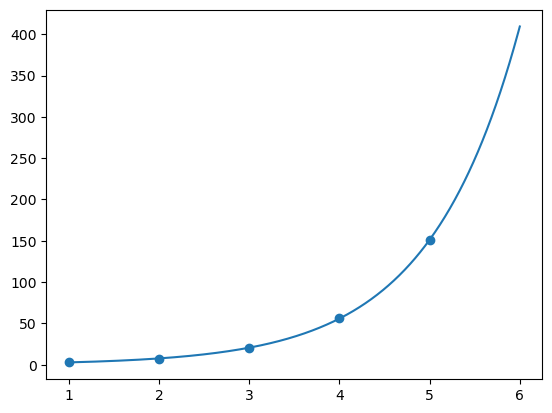

In [14]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.7, 7.3, 20.1, 56.4, 151.1])

def modell(x, a, b):
    return a*np.exp(b*x)

coeff, covar = curve_fit(modell, x, y)
a, b = coeff

x_ny = np.linspace(1,6,1000)
y_ny = modell(x_ny, a, b)

plt.scatter(x, y)
plt.plot(x_ny, y_ny)


__Oppgave 1: Analyse av en enzymkatalysert reaksjon__

Du studerer en enzymkatalysert reaksjon hvor enzymet katalyserer en reaksjon mellom et substrat og et produkt. Målingene viser følgende konsentrasjoner av substratet ($S$) over tid:

| Tid (s) | Konsentrasjon (mM) |
|---------|--------------------|
| 0       | 5.0                |
| 10      | 4.3                |
| 20      | 3.8                |
| 30      | 3.2                |
| 40      | 2.8                |
| 50      | 2.4                |
| 60      | 2.0                |

Lag en eksponentiell modell for nedbrytningen av substratet over tid.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


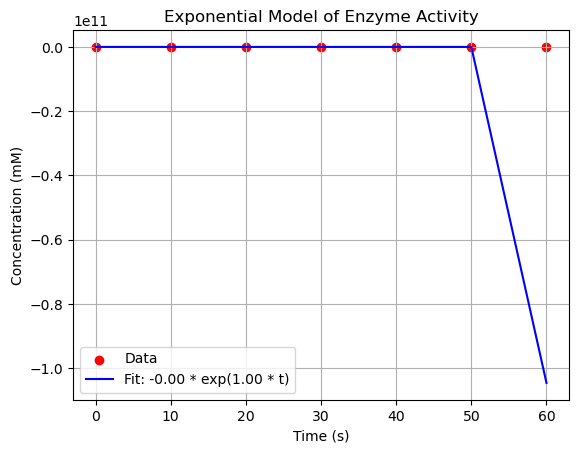

In [9]:
# Kode fra ChatGPT
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data: time in seconds and concentration in mM
time = np.array([0, 10, 20, 30, 40, 50, 60])
concentration = np.array([5.0, 4.3, 3.8, 3.2, 2.8, 2.4, 2.0])

# Define an exponential decay function
def exp_model(t, a, b):
    return a * np.exp(b * t)

# Fit the curve
params, covariance = curve_fit(exp_model, time, concentration)

# Plot the data and the fitted curve
plt.scatter(time, concentration, label='Data', color='red')
plt.plot(time, exp_model(time, *params), label=f'Fit: {params[0]:.2f} * exp({params[1]:.2f} * t)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mM)')
plt.title('Exponential Model of Enzyme Activity')
plt.legend()
plt.grid(True)
plt.show()

### Enda mer fleksibilitet: Maskinlæring og nevrale nettverk

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Setter opp modellen
model = Sequential() # Bestemmer type modell
model.add(Dense(1,input_dim=1))
model.compile(optimizer = "adam", loss = "mean_squared_error") 

# Trener modellen
model.fit(x, y, epochs = 100, verbose = 0)

# Bruker modellen
prediksjon = model.predict(x)

plt.scatter(x,y)
plt.plot(x, prediksjon)
plt.show()


## Hypotesetesting

Hypotesetesting er en metode for å teste om en antagelse om en populasjon er sann. Vi har en nullhypotese $H_0$ og en alternativ hypotese $H_1$. Vi antar at nullhypotesen er sann, og ser hvor sannsynlig det er å observere dataene vi har gitt denne antagelsen. Hvis sannsynligheten er lav, forkaster vi nullhypotesen.


### Uavhengig t-test

In [6]:
import numpy as np
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp

In [2]:
alpha = 0.05
pasienter_medisin = np.array([119,121,115,124,124,120])
pasienter_placebo = np.array([136,142,138,134,134,135])

t_verdi, p_verdi = ttest_ind(pasienter_medisin, pasienter_placebo)
if p_verdi < 0.05:
    print("Det er en signifikant forskjell mellom gruppene")
else:
    print("Det er signifikant forskjell mellom gruppene") 

Det er en signifikant forskjell mellom gruppene


### Paret t-test

In [5]:
før_rens = np.array([200, 220, 190, 195, 210])
etter_rens = np.array([170, 195, 150, 140, 160])

t_verdi, p_verdi = ttest_rel(før_rens, etter_rens)
print(p_verdi)

0.0021729120027175887


### T-test for ett utvalg

In [7]:
koffein = np.array([200, 220, 190, 195, 210])
kjent_snitt = 200

t_verdi, p_verdi = ttest_1samp(koffein, kjent_snitt)
p_verdi

0.607167577712837